In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Python par la pratique : partie 3 - Librairies scientifiques et visualisation de données

Ce notebook fournit des exercices sur NumPy, Pandas, Matplotlib et Seaborn

### Exercice 1 : visualisation avec matplotlib et seaborn

**Question 1**

1. Simuler `n` valeurs selons une loi Gaussienne centrée réduite en utilisant `np.random.normal`.
2. Construire un histogramme avec `plt.hist` et `sns.histplot`
3. Faire varier `n` et commenter le résultat

In [3]:
n = 100000

random_sample = np.random.normal(size=(n))

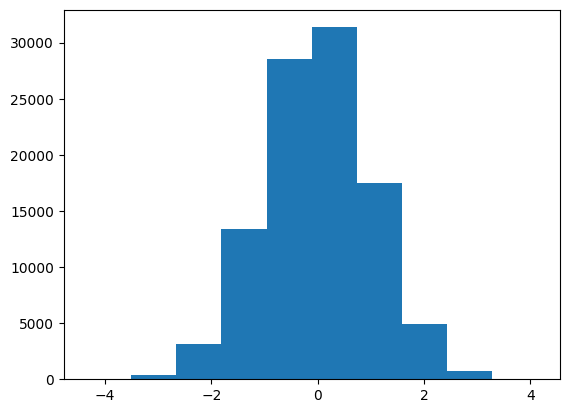

In [5]:
fig = plt.figure()
plt.hist(random_sample)
plt.show()

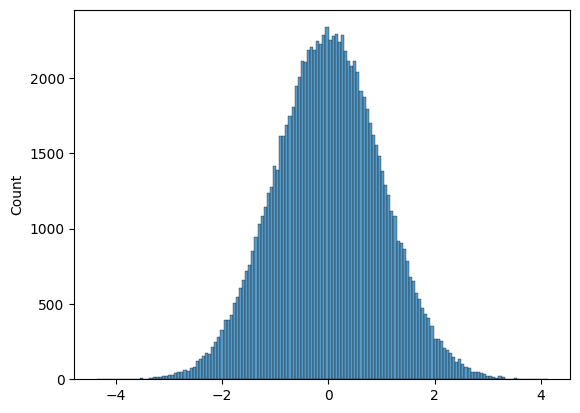

In [8]:
sns.histplot(random_sample)
plt.show()

**Question 2**
1. Simuler un tableau 2D (`n` observations et 2 variables) selon une loi Gaussienne en utilisant `np.random.normal`
2. Construire un nuage de point pour visualiser les deux variables en utilisant `plt.plot`, `plt.scatter` et `sns.scatterplot`

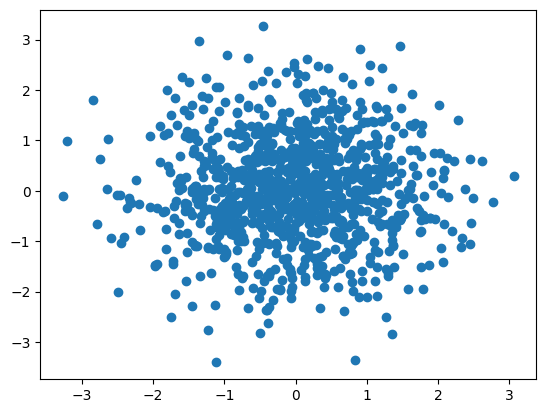

In [10]:
s = np.random.normal(size=(1000, 2))

fig = plt.figure()
plt.scatter(s[:, 0], s[:, 1])
plt.show()

### Exercice 2 : Fibonnacci et nombre d'or

Objectif : calculer la suite de Fibonnacci en n'utilisant que `NumPy` (pas de boucle `for` et `while`) et d'en déduire le [nombre d'or](https://en.wikipedia.org/wiki/Golden_ratio).

***Utiliser uniquement les librairies suivantes : numpy et matplotlib (ou seaborn)***



**Question 1**

Implémenter une fonction `binet` qui renvoie le $n$-ème nombre de la suite de Fibonnacci en utilisant la formule de Binet

$$
F_n = \dfrac{1}{\sqrt{5}} \left[ \left( \dfrac{1 + \sqrt{5}}{2} \right)^n - \left(\dfrac{1 - \sqrt{5}}{2} \right)^n \right]
$$

La fonction prend en argument un entier `n` et renvoie un entier de type `np.int32`.

In [11]:
def binet(n):
    a = (1 + np.sqrt(5)) / 2
    b = (1 - np.sqrt(5)) / 2
    return np.int32((a**n - b**n) / np.sqrt(5))

**Question 2**

Implémenter une fonction `fibo` qui renvoie la suite de Fibonnacci à partir de la formule de Binet pour un entier `n` passé en argument. La fonction renvoir un objet `np.array`.

In [12]:
def fibo(n):
    return binet(np.arange(n))

**Question 3**

Implémenter une fonction `golden_ratio` qui calcule le nombre d'or à partir de la formule de Binet pour un entier `n` passé en argument, sachant que :

$$
\varphi = \lim_{n \rightarrow + \infty} \dfrac{F_{n+1}}{F_n}
$$

In [14]:
def golden_ratio(n):
    return binet(n) / binet(n-1)

**Question 4**

Implémenter une fonction `plot_error` pour visualiser l'écart en valeur absolue entre le résultat de la fonction `golden_ratio` et la vraie valeur $\varphi = \frac{1+\sqrt{5}}{2}$ comme dans la figure ci-dessous. L'idée est de vérifier la limite du rapport $\frac{F_{n+1}}{F_n}$. Autrement dit, visualiser l'écart $\left| \varphi - \frac{F_{n+1}}{F_n} \right|$ en fonction de $n$.

![](./golden.png)

In [15]:
def plot_error(n):
    fib = fibo(n) # fib est np.ndarray
    S_n = fib[2:] / fib[1:n-1]
    phi = (1 + np.sqrt(5)) / 2
    diff = np.abs(S_n - phi)
    plt.plot(diff, "o-")
    plt.ylabel("Absolute difference")
    plt.title("Approximation ot the Golden ratio")
    plt.show()

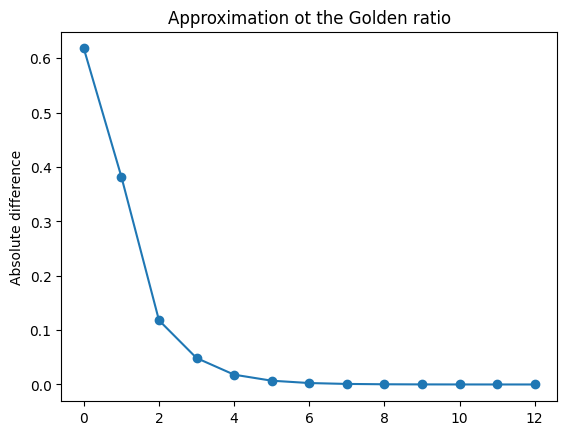

In [16]:
plot_error(15)

### Exercice 3 : Simulation de variables aléatoires

***Utiliser uniquement les librairies suivantes : numpy et matplotlib (ou seaborn)***

Implémenter une fonction `gaussian` qui simule un jeu de données de $n=1000$ observations et $d=10$ covariables :
* simuler 10 covariables $X = (X_1, ..., X_{10})$ selon une loi normale $\mathcal N(0, 1)$
* créer une variable cible $y = 2 X_1 - 3 X_2 + 3 X_3 + \varepsilon$ où $\varepsilon$ suit une loi $\mathcal N(0, 0.01)$
* La fonction `gaussian` doit renvoyer le tuple $(X, y)$. $X$ est de taille $n \times d$ et $y$ de taille $n$. Arguments : `n_rows` et `n_cols`

Implémenter une fonction `gaussian_plot` pour visualiser la distribution des données simulées (histogramme ou densité). Arguments : `x_data` et `y_data`



In [98]:
def gaussian(n_rows, n_cols):
    x_data = np.random.normal(loc=0, scale=1, size=(n_rows, n_cols))
    eps = np.random.normal(loc=0, scale=.01, size=n_rows)
    y_data = 2 * x_data[:, 0] - 3 * x_data[:, 1] + 3 * x_data[:, 2] + eps
    return x_data, y_data

def gaussian_plot(x_data, y_data):
    fig, axes = plt.subplots(2, 1,)
    axes[0].hist(x_data)
    axes[1].hist(y_data)


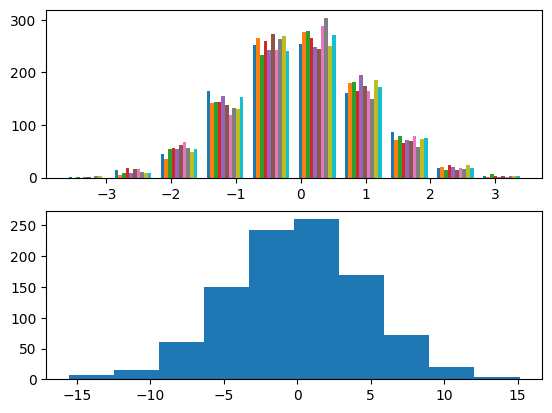

In [99]:
x_data, y_data = gaussian(1000, 10)
gaussian_plot(x_data, y_data)

In [92]:
import seaborn as sns

<Axes: ylabel='Density'>

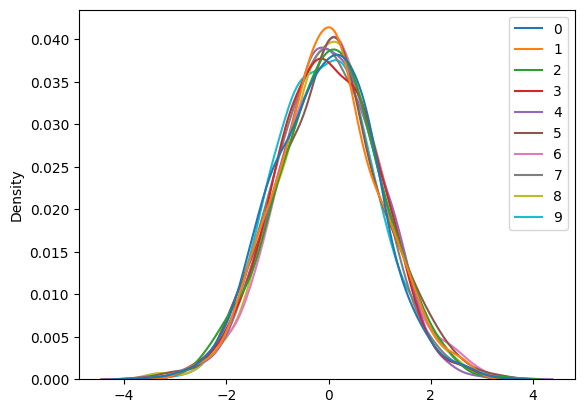

In [96]:
sns.kdeplot(x_data)

<Axes: ylabel='Density'>

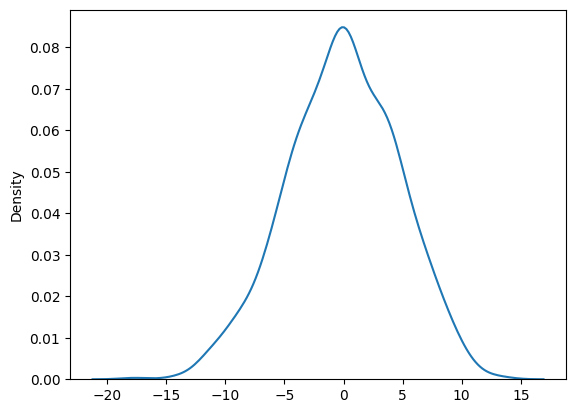

In [97]:
sns.kdeplot(y_data)

### Exercice 4 : The inverse transform sampling

Objectif : simuler des données selon une loi exponentielle de paramètre $\lambda$ de fonction de répartition $F_X$ en utilisant la méthode ``inverse transform sampling`` qui repose sur la proposition suivante :

Proposition : Si $U \sim \mathcal U(0, 1)$ alors $F^{-1}_X(U) \sim F_X$,

où $F^{-1}_X$ est l'inverse généralisée de $F_X$

***Utiliser uniquement les librairies suivantes : numpy et matplotlib et seaborn***

Questions :
* Implémenter une fonction `sampling_uniform` qui génère des données selon une loi uniforme $\mathcal U (0, 1)$. Le résultat est un `np.array` de taille `n_obs`. Argument : `n_obs`
* Implémenter une fonction `exp_inv` qui renvoie l'inverse généralisée de $F_X$. Arguments : `value` la valeur pour laquelle on veut calculer l'inverse généralisée et `lam` la valeur de lambda

Exemple : `exp_inv(value=-1, lam=1)` renvoie -0.693

* Implémenter une fonction `sampling_exponential` qui simule une loi exponentielle de paramètre $\lambda$ en utilisant exclusivement les fonctions `sampling_uniform` et `exp_inv`. Arguments : `n_obs` et `lam`
* Tester avec `n_obs = 100000` et `lam = 1.5`
* Implémenter une fonction `plot_exponential` pour visualiser le résultat comme suit :

![](./exp_sample.png)



In [40]:
def sampling_uniform(n_obs):
    return np.random.uniform(0, 1, size=n_obs)

def exp_inv(value, lam):
    return -np.log(1 - value) / lam

def sampling_exponential(n_obs, lam):
    unif = sampling_uniform(n_obs=n_obs)
    return exp_inv(value=unif, lam=lam)

def plot_exponential(values, lam, n_obs):

    # Compute the true values
    x_val = list(np.linspace(0, 6, n_obs))
    true_values = [lam * np.exp(-lam * x) for x in x_val]

    sns.histplot(values, stat="density", label="Sample distribution")
    plt.plot(x_val, true_values, "k--", label="True distribution")
    plt.legend()
    plt.xlim(right=6)
    plt.title("Exponential sampling")
    plt.show()

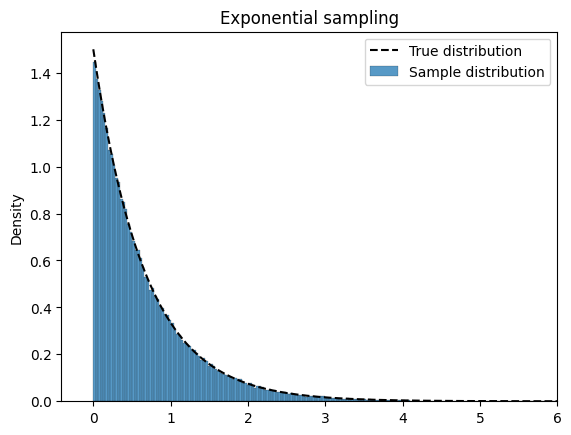

In [41]:
n_obs = 100000
lam = 1.5
values = sampling_exponential(n_obs=n_obs, lam=lam)
plot_exponential(values=values, n_obs=n_obs, lam=lam)

### Exercice 5 : Moindres carrés ordinaires

***Utiliser uniquement la librairie numpy***

L'objectif est de construire l'estimateur des moindres carrés en utilisant la fonction `gaussian` implémentée dans l'exercice 2.

Rappel : l'estimateur des moindres carrés est défini par

$$
\hat \beta = (X^t X)^{-1} X^t y
$$

* Implémenter une fonction `ols` qui consuit l'estimateur des MC à partir de données `x_data` et `y_data` passés en argument. Les arguments doivent être des objets `np.array`, respectivement de taille $n \times d$ et $n$. La fonction renvoie un objet `np.array` de taille $d$.
* Implémenter une fonction `verify` pour vérifier que l'estimateur est proche des vraies valeurs. Tester pour $n=1000$ et $d=10$. Utiliser l'instruction `assert`.

In [42]:
def ols(x_data, y_data):
    a = np.linalg.inv(np.dot(x_data.T, x_data))
    return np.dot(np.dot(a, x_data.T), y_data)

In [43]:
x_data, y_data = gaussian(1000, 10)
beta = ols(x_data, y_data)

In [77]:
def verify(pred, val, error=1e-3):
    assert all(np.abs(pred -val) < error), "The difference between the predictions and the real values is superior to the error margin"

In [78]:
val = np.array([2, -3, 3, 0, 0, 0, 0, 0, 0, 0])

verify(beta, val, error=1e-3)

In [79]:
verify(beta, val, error=1e-8)

AssertionError: The difference between the predictions and the real values is superior to the error margin

### Exercice 6 : Pandas vs NumPy

**Avec Pandas**

1. Comparer `pd.read_csv` pour lire un fichier CSV
2. Visualiser les données
3. Extraire des statistiques (nombre d'observation et colonnes, moyennes, écart-types, correlation, etc.) et construire une `DatFrame` avec le résultat
4. Sauvegarder la `DataFrame` en CSV avec la méthode `to_csv`

**Avec NumPy**

1. Comparer `np.genfromtxt` pour lire un fichier CSV
2. Visualiser les données
3. Extraire des statistiques (nombre d'observation et colonnes, moyennes, écart-types, correlation, etc.) et construire une `np.array` avec le résultat
4. Sauvegarder le `np.array` en CSV avec la routine `np.savetxt` et en NPY avec la routine `np.save`


### pandas

In [52]:
# pandas

data = pd.read_csv("data/weather.csv", sep=";")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,January
1,2012-01-02,10.9,10.6,2.8,4.5,rain,January
2,2012-01-03,0.8,11.7,7.2,2.3,rain,January
3,2012-01-04,20.3,12.2,5.6,4.7,rain,January
4,2012-01-05,1.3,8.9,2.8,6.1,rain,January


In [55]:
stats_df = data.describe()
stats_df

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [54]:
data["weather"].value_counts()

weather
sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: count, dtype: int64

### numpy

In [60]:
data = np.genfromtxt("data/weather.csv", delimiter=";")[1:, 1:-2]

In [63]:
data

array([[ 0. , 12.8,  5. ,  4.7],
       [10.9, 10.6,  2.8,  4.5],
       [ 0.8, 11.7,  7.2,  2.3],
       ...,
       [ 0. ,  7.2,  0.6,  2.6],
       [ 0. ,  5.6, -1. ,  3.4],
       [ 0. ,  5.6, -2.1,  3.5]])

In [65]:
np.mean(data, axis=0)

array([ 3.0294319 , 16.43908282,  8.2347707 ,  3.24113621])

In [66]:
np.std(data, axis=0)

array([6.67790776, 7.34724235, 5.02128486, 1.43733291])

In [67]:
np.median(data, axis=0)

array([ 0. , 15.6,  8.3,  3. ])

In [68]:
np.quantile(data, 0.25, axis=0)

array([ 0. , 10.6,  4.4,  2.2])

In [69]:
np.quantile(data, 0.75, axis=0)

array([ 2.8, 22.2, 12.2,  4. ])

In [70]:
stats_arr = np.array([
    np.mean(data, axis=0),
    np.std(data, axis=0),
    np.median(data, axis=0),
    np.quantile(data, 0.25, axis=0),
    np.quantile(data, 0.75, axis=0)
])

In [71]:
stats_arr

array([[ 3.0294319 , 16.43908282,  8.2347707 ,  3.24113621],
       [ 6.67790776,  7.34724235,  5.02128486,  1.43733291],
       [ 0.        , 15.6       ,  8.3       ,  3.        ],
       [ 0.        , 10.6       ,  4.4       ,  2.2       ],
       [ 2.8       , 22.2       , 12.2       ,  4.        ]])